# Data Exploration

#### In this notebook we will explore the dataset that we are going to train our models with. We will try to find out insides about each feature and about the relations between them

We begin by importing the libraries that we are going to need for this procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

SCRIPTS_FILEPATH = "./../scripts/"
DATA_FILEPATH = "../data/train.csv"

sys.path.append(SCRIPTS_FILEPATH)
from data_cleaner import Data_Cleaner
from proj1_helpers import *

%load_ext autoreload
%autoreload 2

#### Loading the dataset
The next step is to load our dataset. We do that using the Data_Cleaner class whose initialisation does the following : Load the dataset and creates different numpy arrays for the feature matrix, the labels and the ids. Additionaly, it creates a dictionary with the feature names as keys and their index number as value pairs. We also print the shape of each of the 3 parts of the dataset to get a graps of its dimensions.

In [2]:
data = Data_Cleaner(DATA_FILEPATH)

In [3]:
data.feature_names.items()

dict_items([('DER_mass_MMC', 0), ('DER_mass_transverse_met_lep', 1), ('DER_mass_vis', 2), ('DER_pt_h', 3), ('DER_deltaeta_jet_jet', 4), ('DER_mass_jet_jet', 5), ('DER_prodeta_jet_jet', 6), ('DER_deltar_tau_lep', 7), ('DER_pt_tot', 8), ('DER_sum_pt', 9), ('DER_pt_ratio_lep_tau', 10), ('DER_met_phi_centrality', 11), ('DER_lep_eta_centrality', 12), ('PRI_tau_pt', 13), ('PRI_tau_eta', 14), ('PRI_tau_phi', 15), ('PRI_lep_pt', 16), ('PRI_lep_eta', 17), ('PRI_lep_phi', 18), ('PRI_met', 19), ('PRI_met_phi', 20), ('PRI_met_sumet', 21), ('PRI_jet_num', 22), ('PRI_jet_leading_pt', 23), ('PRI_jet_leading_eta', 24), ('PRI_jet_leading_phi', 25), ('PRI_jet_subleading_pt', 26), ('PRI_jet_subleading_eta', 27), ('PRI_jet_subleading_phi', 28), ('PRI_jet_all_pt', 29)])

#### The dataset in a glimpse
We start by taking an overall look of the dimensions of our dataset to get an idea about it. We also check about the percentage of each event/class to see if our training set is balanced.

In [4]:
print("Shape of feature matrix : {}".format(data.tX.shape))
print("Shape of labels column : {}".format(data.y.shape))
print("Shape of ids column : {}".format(data.ids.shape))

signal_percentage = data.y[data.y == 1 ].sum() / len(data.y) * 100
background_percentage = 100 - signal_percentage
print("Percentage of signal events in dataset : {:.1f}".format(signal_percentage))
print("Percentage of background events in dataset : {:.1f}".format(background_percentage))

Shape of feature matrix : (250000, 30)
Shape of labels column : (250000,)
Shape of ids column : (250000,)
Percentage of signal events in dataset : 34.3
Percentage of background events in dataset : 65.7


#### Number of unique values, mean, histogram of values
Moving on, we want to obtain some numerical measures about these features like their mean value and standard deviation as well as the percentage of the variables that are indicated as "may be undefined". From the description of the Higgs Challenge we know that these "undefined" variables are always equal to -999. So we use the function _fill_with_NaN() from our Data_Cleaner class to replace all -999 values with NaN. By doing that, we are able to calculate and print these numbers for all defined variables and finally plot 2 graphs summarizing them.

DER_mass_MMC has 146451 unique values

Percent (%) of samples that have entry: 84.8
Mean value: 121.859
Standard deviation : 57.298
Ratio for std/mean: 0.470


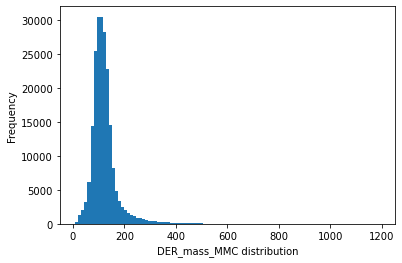

--------------------------------

DER_mass_transverse_met_lep has 101637 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 49.240
Standard deviation : 35.345
Ratio for std/mean: 0.718


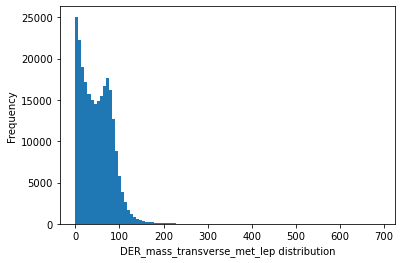

--------------------------------

DER_mass_vis has 100558 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 81.182
Standard deviation : 40.829
Ratio for std/mean: 0.503


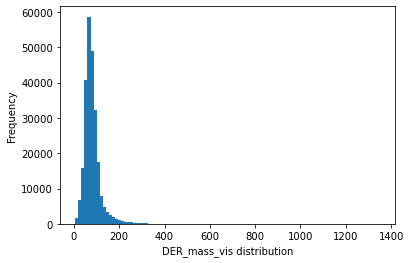

--------------------------------

DER_pt_h has 115563 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 57.896
Standard deviation : 63.656
Ratio for std/mean: 1.099


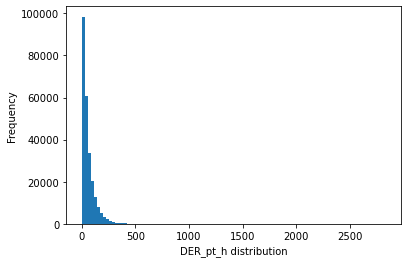

--------------------------------

DER_deltaeta_jet_jet has 184543 unique values

Percent (%) of samples that have entry: 29.0
Mean value: 2.404
Standard deviation : 1.742
Ratio for std/mean: 0.725


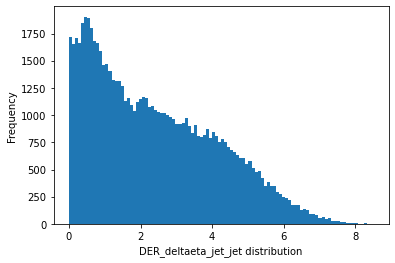

--------------------------------

DER_mass_jet_jet has 245822 unique values

Percent (%) of samples that have entry: 29.0
Mean value: 371.783
Standard deviation : 397.697
Ratio for std/mean: 1.070


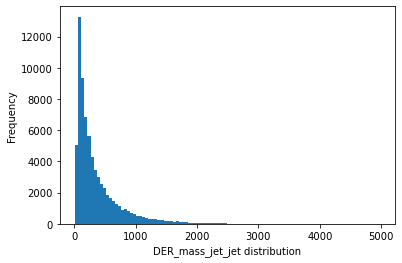

--------------------------------

DER_prodeta_jet_jet has 194049 unique values

Percent (%) of samples that have entry: 29.0
Mean value: -0.822
Standard deviation : 3.584
Ratio for std/mean: -4.362


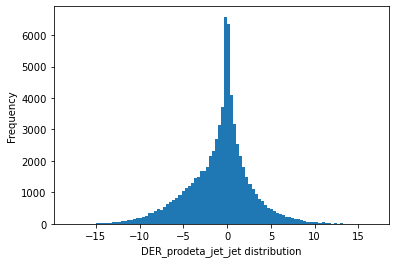

--------------------------------

DER_deltar_tau_lep has 4692 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 2.373
Standard deviation : 0.783
Ratio for std/mean: 0.330


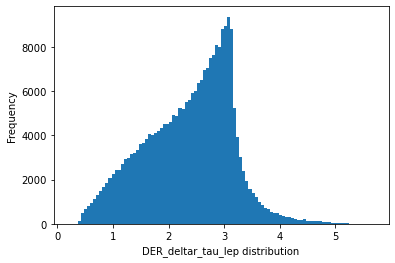

--------------------------------

DER_pt_tot has 59042 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 18.917
Standard deviation : 22.273
Ratio for std/mean: 1.177


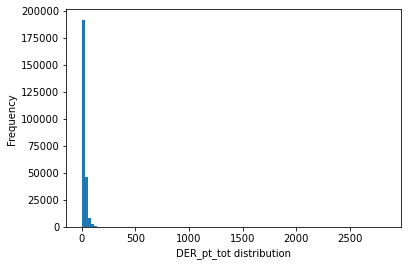

--------------------------------

DER_sum_pt has 156098 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 158.432
Standard deviation : 115.706
Ratio for std/mean: 0.730


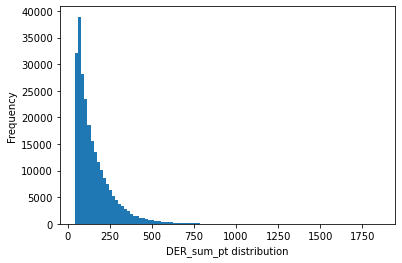

--------------------------------

DER_pt_ratio_lep_tau has 5931 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 1.438
Standard deviation : 0.845
Ratio for std/mean: 0.588


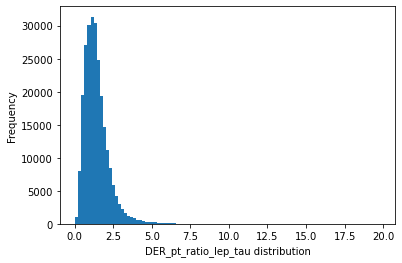

--------------------------------

DER_met_phi_centrality has 2829 unique values

Percent (%) of samples that have entry: 100.0
Mean value: -0.128
Standard deviation : 1.194
Ratio for std/mean: -9.303


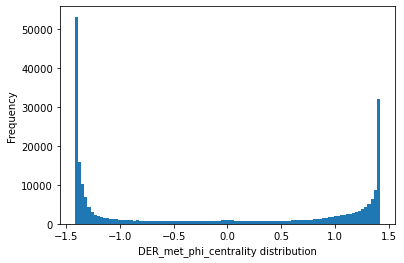

--------------------------------

DER_lep_eta_centrality has 178458 unique values

Percent (%) of samples that have entry: 29.0
Mean value: 0.458
Standard deviation : 0.399
Ratio for std/mean: 0.870


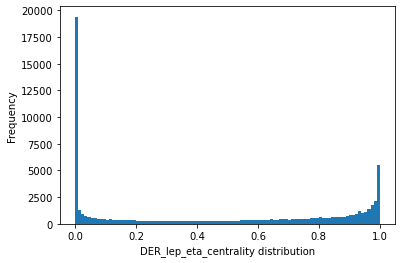

--------------------------------

PRI_tau_pt has 59639 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 38.707
Standard deviation : 22.412
Ratio for std/mean: 0.579


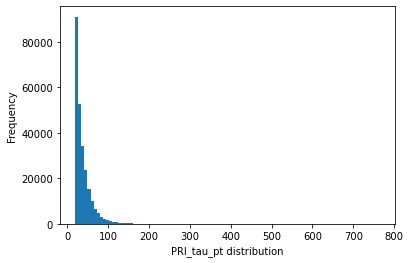

--------------------------------

PRI_tau_eta has 4971 unique values

Percent (%) of samples that have entry: 100.0
Mean value: -0.011
Standard deviation : 1.214
Ratio for std/mean: -110.642


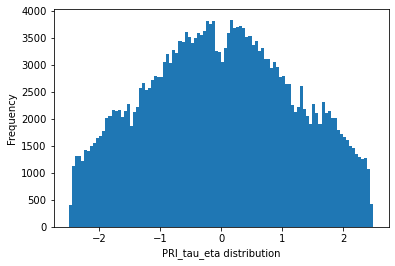

--------------------------------

PRI_tau_phi has 6285 unique values

Percent (%) of samples that have entry: 100.0
Mean value: -0.008
Standard deviation : 1.817
Ratio for std/mean: -222.340


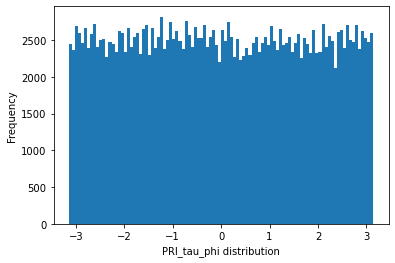

--------------------------------

PRI_lep_pt has 61929 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 46.660
Standard deviation : 22.065
Ratio for std/mean: 0.473


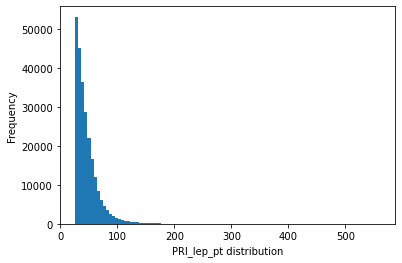

--------------------------------

PRI_lep_eta has 4987 unique values

Percent (%) of samples that have entry: 100.0
Mean value: -0.020
Standard deviation : 1.265
Ratio for std/mean: -64.846


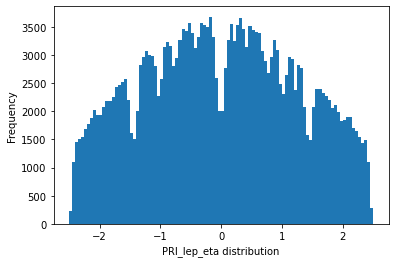

--------------------------------

PRI_lep_phi has 6285 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 0.044
Standard deviation : 1.817
Ratio for std/mean: 41.720


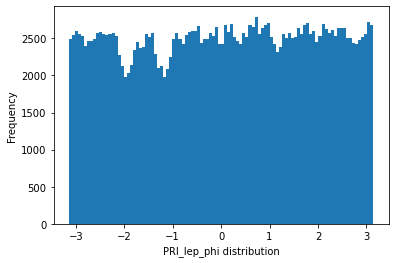

--------------------------------

PRI_met has 87836 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 41.717
Standard deviation : 32.895
Ratio for std/mean: 0.789


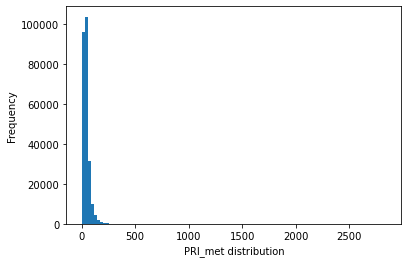

--------------------------------

PRI_met_phi has 6285 unique values

Percent (%) of samples that have entry: 100.0
Mean value: -0.010
Standard deviation : 1.812
Ratio for std/mean: -179.087


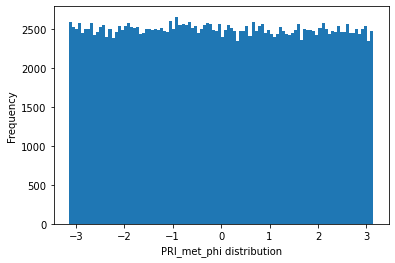

--------------------------------

PRI_met_sumet has 179740 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 209.797
Standard deviation : 126.499
Ratio for std/mean: 0.603


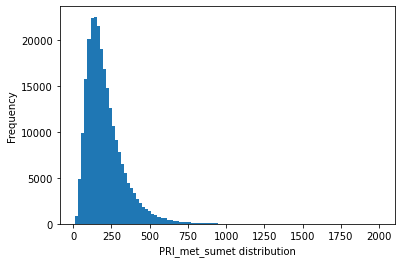

--------------------------------

PRI_jet_num has 4 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 0.979
Standard deviation : 0.977
Ratio for std/mean: 0.998


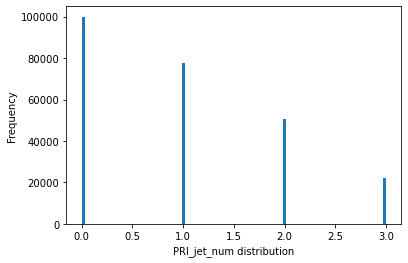

--------------------------------

PRI_jet_leading_pt has 186502 unique values

Percent (%) of samples that have entry: 60.0
Mean value: 84.822
Standard deviation : 60.662
Ratio for std/mean: 0.715


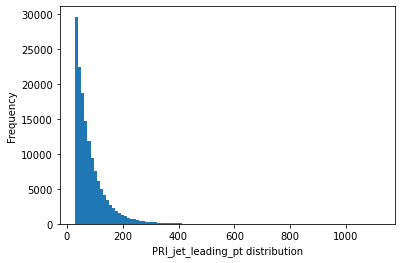

--------------------------------

PRI_jet_leading_eta has 108470 unique values

Percent (%) of samples that have entry: 60.0
Mean value: -0.003
Standard deviation : 1.785
Ratio for std/mean: -544.966


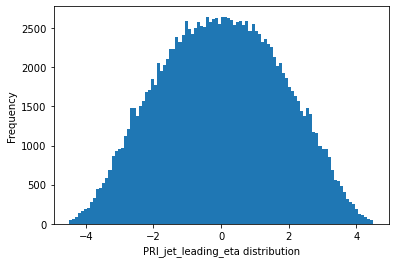

--------------------------------

PRI_jet_leading_phi has 106197 unique values

Percent (%) of samples that have entry: 60.0
Mean value: -0.012
Standard deviation : 1.813
Ratio for std/mean: -146.325


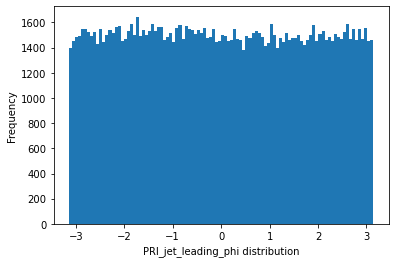

--------------------------------

PRI_jet_subleading_pt has 219920 unique values

Percent (%) of samples that have entry: 29.0
Mean value: 57.679
Standard deviation : 31.986
Ratio for std/mean: 0.555


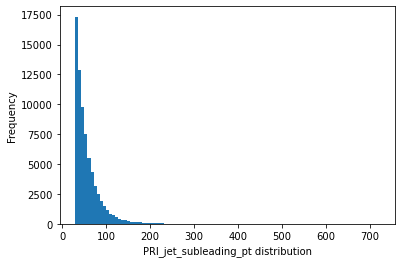

--------------------------------

PRI_jet_subleading_eta has 186084 unique values

Percent (%) of samples that have entry: 29.0
Mean value: -0.012
Standard deviation : 2.032
Ratio for std/mean: -171.522


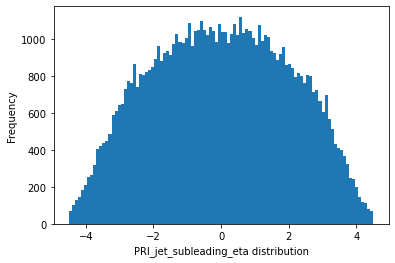

--------------------------------

PRI_jet_subleading_phi has 183742 unique values

Percent (%) of samples that have entry: 29.0
Mean value: -0.002
Standard deviation : 1.817
Ratio for std/mean: -1148.297


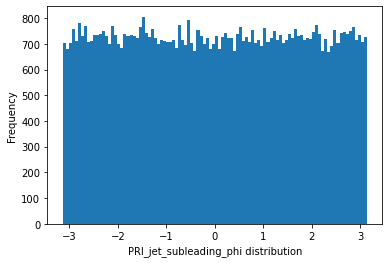

--------------------------------

PRI_jet_all_pt has 103559 unique values

Percent (%) of samples that have entry: 100.0
Mean value: 73.065
Standard deviation : 98.015
Ratio for std/mean: 1.341


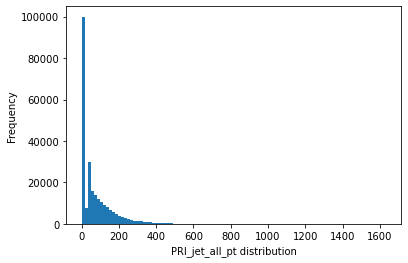

--------------------------------



<function matplotlib.pyplot.show(close=None, block=None)>

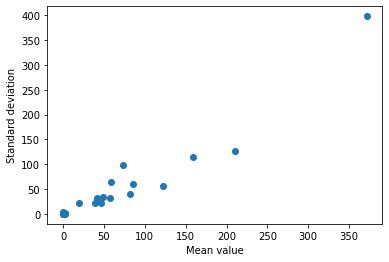

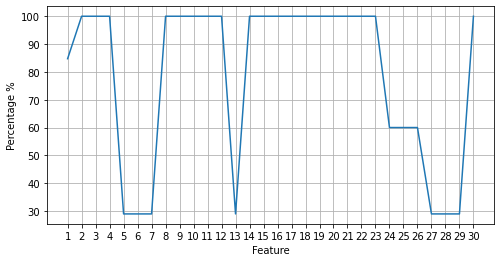

In [5]:
data._fill_with_NaN()

percentages = []
mean_values = []
std_values = []

for feature_name, index in data.feature_names.items():
    f_vals = data.tX[:,index]
    num_unique = len(np.unique(f_vals))
    print("{} has {} unique values\n".format(feature_name,num_unique))
    
    mean = np.nanmean(f_vals)
    std = np.nanstd(f_vals)
    percentage = np.count_nonzero(~np.isnan(f_vals))/len(f_vals)*100
    mean_values.append(mean)
    std_values.append(std)
    percentages.append(percentage)    
    
    print("Percent (%) of samples that have entry: {:.1f}".format(percentage))
    print("Mean value: {:.3f}".format(mean))
    print("Standard deviation : {:.3f}".format(std))
    print("Ratio for std/mean: {:.3f}".format(std/mean))
    plt.figure()
    plt.hist(f_vals,bins= 100)
    plt.xlabel("{} distribution".format(feature_name))
    plt.ylabel('Frequency')
    plt.savefig('../plots/Distribution for {}'.format(feature_name))
    plt.show()
    print("--------------------------------\n")

plt.figure()
plt.scatter(mean_values, std_values)  
plt.xlabel('Mean value')
plt.ylabel('Standard deviation')
plt.savefig('../plots/mean_vs_std2.png')

plt.show

plt.figure(figsize=(8,4))
plt.plot(np.linspace(1,30,num = 30),percentages)
plt.xticks(np.linspace(1,30,num = 30))
plt.xlabel('Feature')
plt.ylabel('Percentage %')
plt.grid()
plt.savefig('../plots/Percentage')
plt.show

#### Cleaning the dataset 
For the following procedures the np.NaN values pose a problem that we have to solve. We identify 2 cases for variables that are indicated as "may be undefined" :
1. Variables from the first feature DER_mass_MMC which estimates the mass $m_H$ of the Higgs boson candidate. In this case these variables can't be defined as the topology of the event is too far from the expected topology. To solve this, we fill all np.NaN values of this feature with the median value of the remaining feature's values.
2. Features related to jets. These features have some of their variables undefined because jets have not been detected in the event and so they are meaningless. To tackle this problem we fill all these undefined variables with 0.

After treating all the undefined variables we also normalize our dataset.

In [6]:
data.fix_mass_MMC(add_impute_array = False)
data.replace_with_zero()
data.normalize()

#### Correlation of features
We visualize the correlation between the features of our dataset

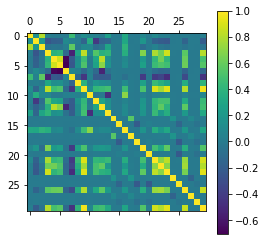

In [7]:
corr_mat = np.corrcoef(data.tX,rowvar=False)
plt.matshow(corr_mat)
plt.colorbar()
plt.savefig('../plots/Correlation')
plt.show()

#### Principal component analysis

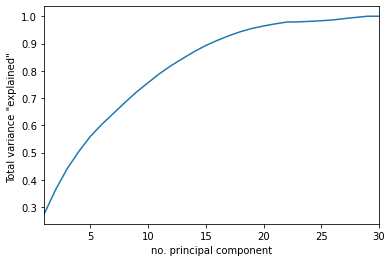

In [8]:
cov_mat = np.cov(data.tX.T) #calculate covariance matrix
eigval_pca, eigvec_pca = np.linalg.eig(cov_mat) #can not be orderd, but they are here

total_eigval = np.sum(eigval_pca)
percentages = [eigval/total_eigval for eigval in eigval_pca]
percentages_cumulative = np.cumsum(percentages)
plt.plot(np.arange(1,len(eigval_pca)+1),percentages_cumulative)
plt.xlim(1,len(eigval_pca))
plt.ylabel("Total variance \"explained\" ")
plt.xlabel("no. principal component")
plt.savefig('../plots/PCA')
plt.show()

Arbitrarily choose cutoff when more than $0.95$% of the cumulative variance is explained

In [9]:
greater_095 = np.argmax(percentages_cumulative > 0.95) #stops at first true
print("{} principal components can explain more than 95% of the variance".format(greater_095+1))

19 principal components can explain more than 95% of the variance


#### Project onto principal components
v : (..., M, M) array 
  The normalized (unit "length") eigenvectors, 
  such that the 
        column ``v[:,i]`` is the eigenvector corresponding to the 
        eigenvalue ``w[i]``.

In [10]:
pcas_095 = eigvec_pca[:,:greater_095]
pcas_095_other = (eigvec_pca.T[:][:greater_095]).T
np.allclose(pcas_095_other, pcas_095)
projection_mat = eigvec_pca[:,:greater_095]
projected_data = data.tX @  projection_mat
projected_data.shape

(250000, 18)